## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [276]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [277]:
#read cv dataset
df=pd.read_csv('ab_data.csv')
# display the first 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [278]:
#display number of rows
len(df.index)

294478

c. The number of unique users in the dataset.

In [279]:
#display the unique users
df.user_id.nunique()

290584

d. The proportion of users converted.

In [280]:
# display the proportion of users converted by using the mean 
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [281]:
# display the number of times the new_page and treatment don't line up by summing the values that do not line up
df.query('landing_page=="new_page" and group=="control"').count()[0]+df.query('landing_page=="old_page" and group=="treatment"').count()[0]

3893

f. Do any of the rows have missing values?

In [282]:
# display the sum of null for each column
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [283]:
# only rows with treatment and old page
d1=df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
# only page with control and new page
d2=df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]
# concat the above together
concatDf2=pd.concat([d1,d2])
# drop the rows in the concatDf2 
df2 = df.drop(concatDf2.index)

In [284]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2.group == 'treatment') == (df2.landing_page == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [285]:
# display the number of unique user_ids
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [286]:
# display the repeated user_id
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [287]:
# display the information for the repeated user_id
df2[df2.user_id.duplicated(keep=False)].info

<bound method DataFrame.info of       user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0>

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [288]:
# #display number of rows before removing 
len(df2.index)

290585

In [289]:
# drop the second duplicated user_id
df2.drop_duplicates('user_id', keep='first',inplace=True)

In [290]:
#display number of rows after removing
len(df2.index)

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [291]:
# display the proportion of users converted by using the mean 
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [292]:
# display the probability of a user in the control group to be coverted 
df2[df2['group']=='control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [293]:
# display the probability of a user in the treatment group to be coverted 
df2[df2['group']=='treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [294]:
# display the probability of a user receiving the new page  
(df2.landing_page=='new_page').mean()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

people in the control group is probability to be converted is more than people in the treatment group but in a very small magnitude 
it means that it is not concluded that the new page has the most conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

null hypotheses:
𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <= 0

alternate hypotheses:
𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [295]:
# convert rate for pnew 
newP=df2.converted.mean()
newP

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [296]:
# convert rate for pold 
oldP=df2.converted.mean()
oldP

0.11959708724499628

c. What is $n_{new}$?

In [297]:
# calculating nnew
newN=df2[df2['landing_page']=='new_page']['user_id'].count()
newN

145310

d. What is $n_{old}$?

In [298]:
#calculating nold
oldN=df2[df2['landing_page']=='old_page']['user_id'].count()
oldN

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [299]:
#simulate using binomial distribution
new_page_converted=np.random.binomial(1, newP, newN)


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [300]:
#simulate using binomial distribution
old_page_converted=np.random.binomial(1, oldP, oldN)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [301]:
# calculating the difference between 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑
new_page_converted.mean()-old_page_converted.mean()

0.0016014434123774735

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [302]:
#simulate 10000 samples via calculating the difference between 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑
p_diffs=[]
for i in range(10000):
   new_page_converted=np.random.binomial(1, newP, newN).mean()
   old_page_converted=np.random.binomial(1, oldP, oldN).mean()
   p_diffs.append(new_page_converted-old_page_converted)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

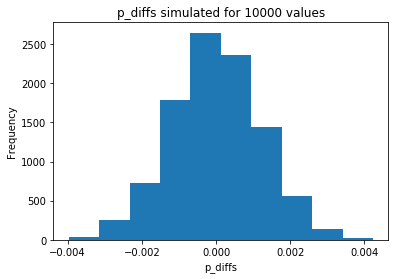

In [303]:
# plotting the p_diffs histogram
plt.hist(p_diffs)
# x label
plt.xlabel('p_diffs')
# y label
plt.ylabel('Frequency')
#title
plt.title('p_diffs simulated for 10000 values');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [304]:
# calculating the proportion of the p_diffs greater than the actual difference
A_diffs=(df2[df2['group']=='treatment']['converted'].mean())-(df2[df2['group']=='control']['converted'].mean())
A_diffs

-0.0015782389853555567

In [305]:
(A_diffs < np.array(p_diffs)).mean()

0.90710000000000002

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

A_diffs which is Actual Difference is the Difference between the converted new page and old page 
p_diffs which is the Simulated 10,000 values by the difference between the converted new page and old page 
the p-value is 0.90 which is calculated in the above cell 
p-value is the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
at last it is condcuted that new page and old page is slightly similar although the old page performs a little better than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [306]:
import statsmodels.api as sm

# sum of conversion for old page 
convert_old = sum(df2[df2['group']=='control']['converted'])
# sum of conversion for new page 
convert_new = sum(df2[df2['group']=='treatment']['converted'])
# number of users in old page 
n_old = df2[df2['group']=='control']['user_id'].count()
# number of users in new page 
n_new = df2[df2['group']=='treatment']['user_id'].count()
# print the values above
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [307]:
# calculate z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score ,p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

the z-score is the number of standard deviations from the mean a data point is. But more technically it's a measure of how many standard deviations below or above the population mean a raw score is. A z-score is also known as a standard score and it can be placed on a normal distribution curve. (www.statisticshowto.datasciencecentral.com)

the p-score is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true – the definition of 'extreme' depends on how the hypothesis is being tested. (https://www.statsdirect.com/help/basics/p_values.htm)

the z-score is 1.31 and the p-score is 0.90, it has showed that the old page is a little bit better than the new page and that will conclude  to fail to reject the null hypothesis.
Both those values agree with the findings in parts j. and k. 
using the standard statistical test and bootstrapping method are the same result which is the old page is a little better than the new page and they fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [308]:
#creating intercept column 
df2['intercept']=1
#creating dummies
ab_page = ['treatment', 'control']
df2['ab_page']= pd.get_dummies(df2.group)['treatment']

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [309]:
# creating the regression model (logistic regression)
logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [310]:
# display the summary
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        00:33:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.190 and it is lower than the p_value that was found in part II
The reason for the different p_value is the added intercept

null hypotheses:
𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 = 0
alternative hypotheses:
𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 != 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

it is a good idea to consider other factors to add into your regression model because those factors may help in decisions resulting to be more accurate and significante.
of course there is disadvantages to adding additional terms into the regression model such as make it more complex also some additional term may result to be useless and affect the result in a bad way.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [311]:
#read cv dataset
countries = pd.read_csv('./countries.csv')
# display the first five rows 
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [312]:
# join the df2 user_id with the countries user_id
con = df2.set_index('user_id').join(countries.set_index('user_id'))
# display the first five rows 
con.head()


,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [313]:
# creating dummy variables
con[['US', 'UK']] = pd.get_dummies(con['country'])[['US','UK']]
# display the first five rows 
con.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [314]:
# creating the regression model (logistic regression) and displaying the summary
con['intercept'] = 1
sm.Logit(con['converted'], con[['US', 'UK','intercept','ab_page']]).fit().summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        00:33:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

<a id='conclusions'></a>


in the above regression it has been shown that the country has an affect on pages convert and that the convert rate in US is higher than UK but even though the affect is not significantly high so, it has been contucted that the new page is not better than the old page and fail to reject the null hypothesis.

## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!




## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [315]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0